# Generating imbalanced in tabular data

This tutorial shows how to generate imbalanced data on pre-existing tabular data and to visualize both the original and the transformed data




In [22]:
from sklearn.datasets import load_iris
from badgers.transforms.tabular_data.imbalance import RandomSamplingClassesTransformer, RandomSamplingFeaturesTransformer
from badgers.core.utils import normalize_proba
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [13]:
data = load_iris()

X = data['data']
y = data['target']

## TITLE

### TITLE

In [28]:
def sampling_proba_func(X):
    feature = X[:,1]
    return normalize_proba(
        1. - (np.max(feature)-feature) / (np.max(feature)-np.min(feature))
    )

trf = RandomSamplingFeaturesTransformer(percentage_missing=10, sampling_proba_func=sampling_proba_func)
Xt = trf.transform(X.copy())

In [36]:
pd.Series(data=sampling_proba_func(X),index=X[:,1]).nlargest(25)

4.4    0.015132
4.2    0.013871
4.1    0.013241
4.0    0.012610
3.9    0.011980
3.9    0.011980
3.8    0.011349
3.8    0.011349
3.8    0.011349
3.8    0.011349
3.8    0.011349
3.8    0.011349
3.7    0.010719
3.7    0.010719
3.7    0.010719
3.6    0.010088
3.6    0.010088
3.6    0.010088
3.6    0.010088
3.5    0.009458
3.5    0.009458
3.5    0.009458
3.5    0.009458
3.5    0.009458
3.5    0.009458
dtype: float64

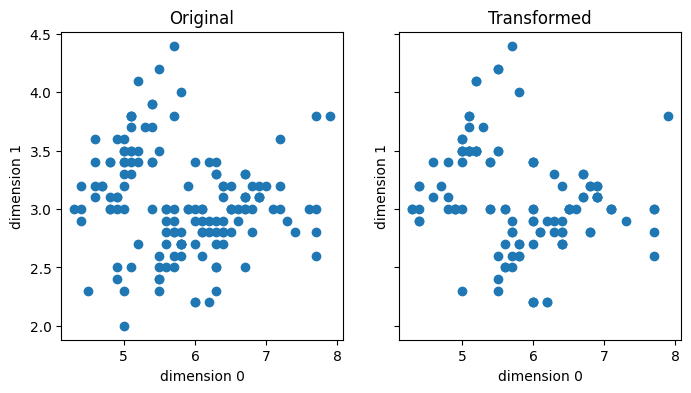

In [38]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))

axes[0].scatter(X[:,0], X[:,1])
axes[1].scatter(Xt[:,0], Xt[:,1])
axes[0].set_title('Original')
axes[1].set_title('Transformed')
axes[0].set_xlabel('dimension 0', fontsize=10)
axes[1].set_xlabel('dimension 0', fontsize=10)
axes[0].set_ylabel('dimension 1', fontsize=10)
axes[1].set_ylabel('dimension 1', fontsize=10);

### TITLE



In [32]:
trf = RandomSamplingClassesTransformer(min_instances=20)
Xt = trf.fit_transform(X.copy(),y)

In [49]:
np.where(y == label)

(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], dtype=int64),)

Text(0, 0.5, 'dimension 1')

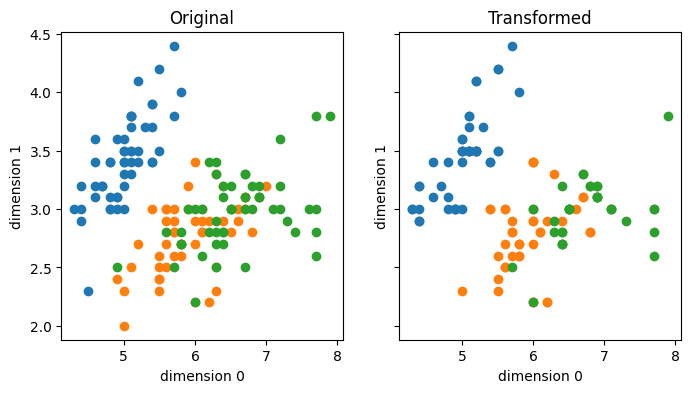

In [51]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
for label in np.unique(y):
    ix = np.where(y == label)[0]
    axes[0].scatter(X[ix,0], X[ix,1], c=f'C{label}', label=f'{label}')
for label in np.unique(trf.labels_):
    ix = np.where(trf.labels_ == label)[0]
    axes[1].scatter(Xt[ix,0], Xt[ix,1], c=f'C{label}', label=f'{label}')

axes[0].set_title('Original')
axes[1].set_title('Transformed')
axes[0].set_xlabel('dimension 0', fontsize=10)
axes[1].set_xlabel('dimension 0', fontsize=10)
axes[0].set_ylabel('dimension 1', fontsize=10)
axes[1].set_ylabel('dimension 1', fontsize=10)